# Results Analysis Notebook
## Statistical Testing and Performance Evaluation

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats
import sys
import os

# Add src to path
sys.path.append('../src')
from evaluation import Evaluator

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create outputs directory
# os.makedirs('../outputs', exist_ok=True)

## 1. Load and Combine Results

In [2]:
# Initialize evaluator
evaluator = Evaluator()

# Load all results
print("Loading results from all models...")
all_results = evaluator.load_and_combine_results()

if all_results is not None:
    print(f"Total results loaded: {len(all_results)}")
    print(f"Models: {all_results['model'].unique()}")
    print(f"Runs: {all_results['run'].unique()}")
    print(f"Folds: {all_results['fold'].unique()}")
    
    # Display first few rows
    print("\nFirst few rows of combined results:")
    print(all_results.head())
else:
    print("No results found. Please run the model training notebook first.")
    print("Expected files in ../outputs/:")
    print("  - hfe_ddl_results.csv")
    print("  - word2vec_results.csv") 
    print("  - code2vec_results.csv")
    print("  - codebert_results.csv (optional)")

Loading results from all models...
Total results loaded: 40
Models: ['code2vec' 'word2vec' 'codebert' 'hfe_ddl']
Runs: [1]
Folds: [ 1  2  3  4  5  6  7  8  9 10]

First few rows of combined results:
   run  fold  seed     model  f1_score  accuracy    recall  precision     tn  \
0    1     1    42  code2vec  0.950639  0.951498  0.934097   0.967777  18598   
1    1     2    42  code2vec  0.950724  0.951524  0.935296   0.966670  18576   
2    1     3    42  code2vec  0.949710  0.950586  0.933160   0.966857  18581   
3    1     4    42  code2vec  0.951561  0.952383  0.935400   0.968290  18607   
4    1     5    42  code2vec  0.952748  0.953425  0.939099   0.966801  18576   

    fp    fn     tp  
0  597  1265  17930  
1  619  1242  17953  
2  614  1283  17912  
3  588  1240  17955  
4  619  1169  18026  


## 2. Descriptive Statistics

In [3]:
if all_results is not None:
    # Calculate descriptive statistics
    print("Descriptive Statistics by Model:")
    print("=" * 70)
    
    stats_summary = all_results.groupby('model').agg({
        'f1_score': ['count', 'mean', 'std', 'min', 'max'],
        'accuracy': ['mean', 'std'],
        'precision': ['mean', 'std'],
        'recall': ['mean', 'std']
    }).round(4)
    
    print(stats_summary)
    
    # Calculate confidence intervals
    print("\n95% Confidence Intervals for F1 Score:")
    print("-" * 50)
    
    for model in all_results['model'].unique():
        model_data = all_results[all_results['model'] == model]['f1_score']
        n = len(model_data)
        mean = model_data.mean()
        std = model_data.std()
        
        # Calculate 95% CI
        ci_low = mean - 1.96 * (std / np.sqrt(n))
        ci_high = mean + 1.96 * (std / np.sqrt(n))
        
        print(f"{model:10} : {mean:.4f} [{ci_low:.4f}, {ci_high:.4f}] (n={n})")

Descriptive Statistics by Model:
         f1_score                                 accuracy         precision  \
            count    mean     std     min     max     mean     std      mean   
model                                                                          
code2vec       10  0.9507  0.0012  0.9484  0.9527   0.9515  0.0012    0.9670   
codebert       10  0.9340  0.0014  0.9317  0.9364   0.9357  0.0013    0.9595   
hfe_ddl        10  0.9606  0.0008  0.9600  0.9620   0.9608  0.0009    0.9647   
word2vec       10  0.9469  0.0014  0.9451  0.9503   0.9477  0.0014    0.9612   

                  recall          
             std    mean     std  
model                             
code2vec  0.0010  0.9349  0.0019  
codebert  0.0010  0.9098  0.0022  
hfe_ddl   0.0027  0.9567  0.0029  
word2vec  0.0017  0.9330  0.0020  

95% Confidence Intervals for F1 Score:
--------------------------------------------------
code2vec   : 0.9507 [0.9499, 0.9514] (n=10)
word2vec   : 0.9469 [0.946

## 3. Performance Visualization

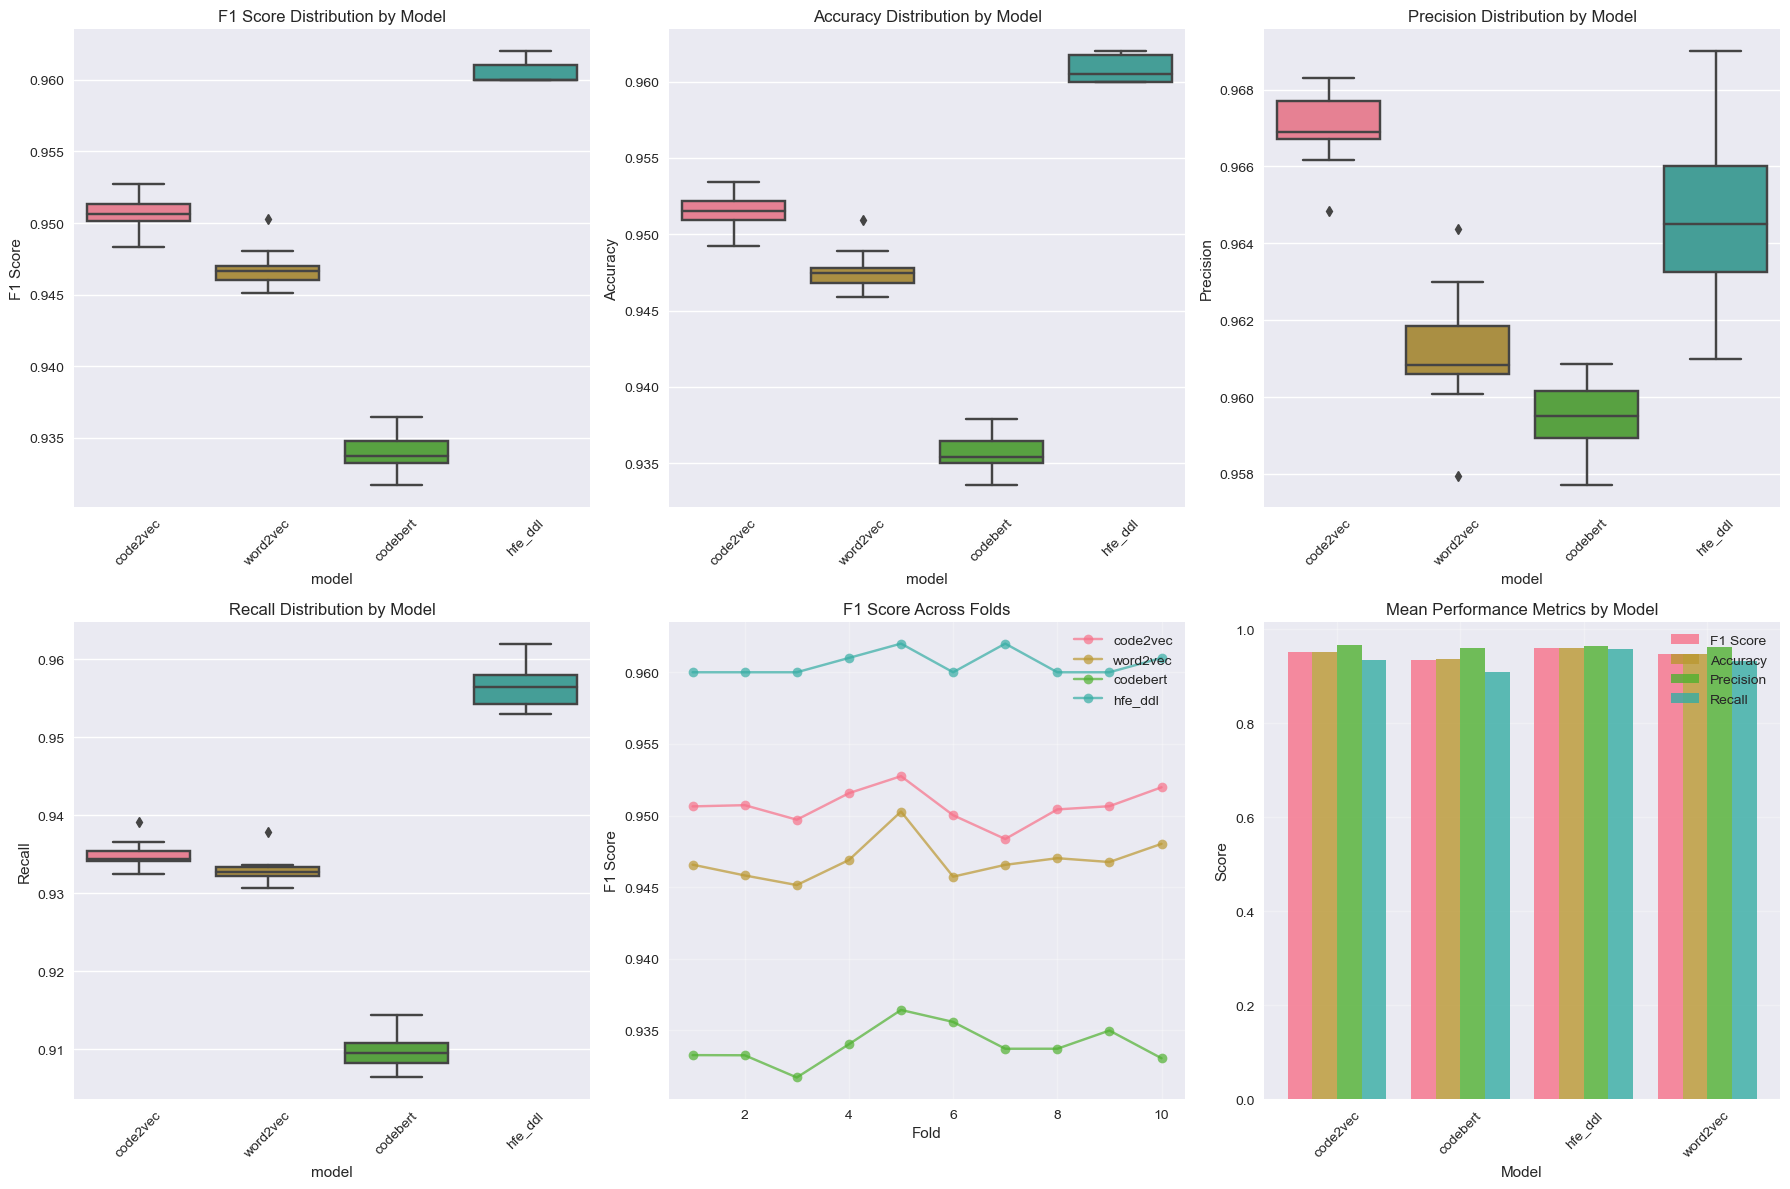

Comprehensive performance analysis saved to '../outputs/comprehensive_performance_analysis.png'


In [4]:
if all_results is not None:
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. F1 Score comparison
    sns.boxplot(data=all_results, x='model', y='f1_score', ax=axes[0, 0])
    axes[0, 0].set_title('F1 Score Distribution by Model')
    axes[0, 0].set_ylabel('F1 Score')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Accuracy comparison
    sns.boxplot(data=all_results, x='model', y='accuracy', ax=axes[0, 1])
    axes[0, 1].set_title('Accuracy Distribution by Model')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. Precision-Recall comparison
    sns.boxplot(data=all_results, x='model', y='precision', ax=axes[0, 2])
    axes[0, 2].set_title('Precision Distribution by Model')
    axes[0, 2].set_ylabel('Precision')
    axes[0, 2].tick_params(axis='x', rotation=45)
    
    # 4. Recall comparison
    sns.boxplot(data=all_results, x='model', y='recall', ax=axes[1, 0])
    axes[1, 0].set_title('Recall Distribution by Model')
    axes[1, 0].set_ylabel('Recall')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # 5. Performance across folds
    for model in all_results['model'].unique():
        model_data = all_results[all_results['model'] == model]
        axes[1, 1].plot(model_data['fold'], model_data['f1_score'], 
                       marker='o', label=model, alpha=0.7)
    axes[1, 1].set_title('F1 Score Across Folds')
    axes[1, 1].set_xlabel('Fold')
    axes[1, 1].set_ylabel('F1 Score')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    # 6. Mean performance comparison
    mean_performance = all_results.groupby('model').agg({
        'f1_score': 'mean',
        'accuracy': 'mean',
        'precision': 'mean', 
        'recall': 'mean'
    }).round(4)
    
    x = np.arange(len(mean_performance.index))
    width = 0.2
    
    axes[1, 2].bar(x - width*1.5, mean_performance['f1_score'], width, label='F1 Score', alpha=0.8)
    axes[1, 2].bar(x - width/2, mean_performance['accuracy'], width, label='Accuracy', alpha=0.8)
    axes[1, 2].bar(x + width/2, mean_performance['precision'], width, label='Precision', alpha=0.8)
    axes[1, 2].bar(x + width*1.5, mean_performance['recall'], width, label='Recall', alpha=0.8)
    
    axes[1, 2].set_title('Mean Performance Metrics by Model')
    axes[1, 2].set_xlabel('Model')
    axes[1, 2].set_ylabel('Score')
    axes[1, 2].set_xticks(x)
    axes[1, 2].set_xticklabels(mean_performance.index, rotation=45)
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../outputs/comprehensive_performance_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Comprehensive performance analysis saved to '../outputs/comprehensive_performance_analysis.png'")

## 4. Statistical Significance Testing

In [5]:
if all_results is not None:
    # Perform statistical tests
    evaluator.perform_statistical_tests(all_results)
    
    # Additional detailed statistical analysis
    print("\n" + "="*60)
    print("DETAILED STATISTICAL ANALYSIS")
    print("="*60)
    
    # Create paired results for detailed analysis
    paired_results = all_results.pivot_table(
        index=['run', 'fold'],
        columns='model',
        values=['f1_score', 'accuracy', 'precision', 'recall']
    ).reset_index()
    
    # Compare HFE-DDL with each baseline
    baseline_models = [model for model in all_results['model'].unique() if model != 'hfe_ddl']
    
    for baseline in baseline_models:
        if ('f1_score', 'hfe_ddl') in paired_results.columns and ('f1_score', baseline) in paired_results.columns:
            hfe_scores = paired_results[('f1_score', 'hfe_ddl')].dropna()
            baseline_scores = paired_results[('f1_score', baseline)].dropna()
            
            # Ensure same length
            min_len = min(len(hfe_scores), len(baseline_scores))
            hfe_scores = hfe_scores[:min_len]
            baseline_scores = baseline_scores[:min_len]
            
            # Paired t-test
            t_stat, p_value = stats.ttest_rel(hfe_scores, baseline_scores)
            
            # Effect size (Cohen's d)
            differences = hfe_scores - baseline_scores
            cohen_d = np.mean(differences) / np.std(differences, ddof=1)
            
            print(f"\nHFE-DDL vs {baseline.upper()} - Detailed Analysis:")
            print(f"  Mean HFE-DDL F1: {hfe_scores.mean():.4f}")
            print(f"  Mean {baseline} F1: {baseline_scores.mean():.4f}")
            print(f"  Mean difference: {hfe_scores.mean() - baseline_scores.mean():.4f}")
            print(f"  T-statistic: {t_stat:.4f}")
            print(f"  P-value: {p_value:.4f}")
            print(f"  Cohen's d: {cohen_d:.4f}")
            
            # Interpret effect size
            if abs(cohen_d) < 0.2:
                effect_size = "negligible"
            elif abs(cohen_d) < 0.5:
                effect_size = "small"
            elif abs(cohen_d) < 0.8:
                effect_size = "medium"
            else:
                effect_size = "large"
                
            print(f"  Effect size: {effect_size}")
            
            if p_value < 0.05:
                if cohen_d > 0:
                    print(f"  → HFE-DDL significantly outperforms {baseline} with {effect_size} effect size")
                else:
                    print(f"  → {baseline} significantly outperforms HFE-DDL with {effect_size} effect size")
            else:
                print(f"  → No significant difference between HFE-DDL and {baseline}")

Performing statistical tests...

PAIRED T-TESTS (HFE-DDL vs Baselines):

HFE-DDL vs CODE2VEC:
  T-statistic: 23.0807
  P-value: 0.0000
  → HFE-DDL significantly outperforms code2vec (p < 0.05)

HFE-DDL vs WORD2VEC:
  T-statistic: 40.5376
  P-value: 0.0000
  → HFE-DDL significantly outperforms word2vec (p < 0.05)

HFE-DDL vs CODEBERT:
  T-statistic: 62.8724
  P-value: 0.0000
  → HFE-DDL significantly outperforms codebert (p < 0.05)

DETAILED STATISTICAL ANALYSIS

HFE-DDL vs CODE2VEC - Detailed Analysis:
  Mean HFE-DDL F1: 0.9606
  Mean code2vec F1: 0.9507
  Mean difference: 0.0099
  T-statistic: 23.0807
  P-value: 0.0000
  Cohen's d: 7.2988
  Effect size: large
  → HFE-DDL significantly outperforms code2vec with large effect size

HFE-DDL vs WORD2VEC - Detailed Analysis:
  Mean HFE-DDL F1: 0.9606
  Mean word2vec F1: 0.9469
  Mean difference: 0.0137
  T-statistic: 40.5376
  P-value: 0.0000
  Cohen's d: 12.8191
  Effect size: large
  → HFE-DDL significantly outperforms word2vec with large

## 5. Confusion Matrix Analysis


Average Confusion Matrices:
               tp     fp      fn       tn
model                                    
code2vec  17945.7  613.0  1248.9  18581.9
codebert  17463.0  737.0  1731.6  18457.9
hfe_ddl   18525.5  669.4   832.7  18361.9
word2vec  17908.9  723.6  1285.7  18471.3


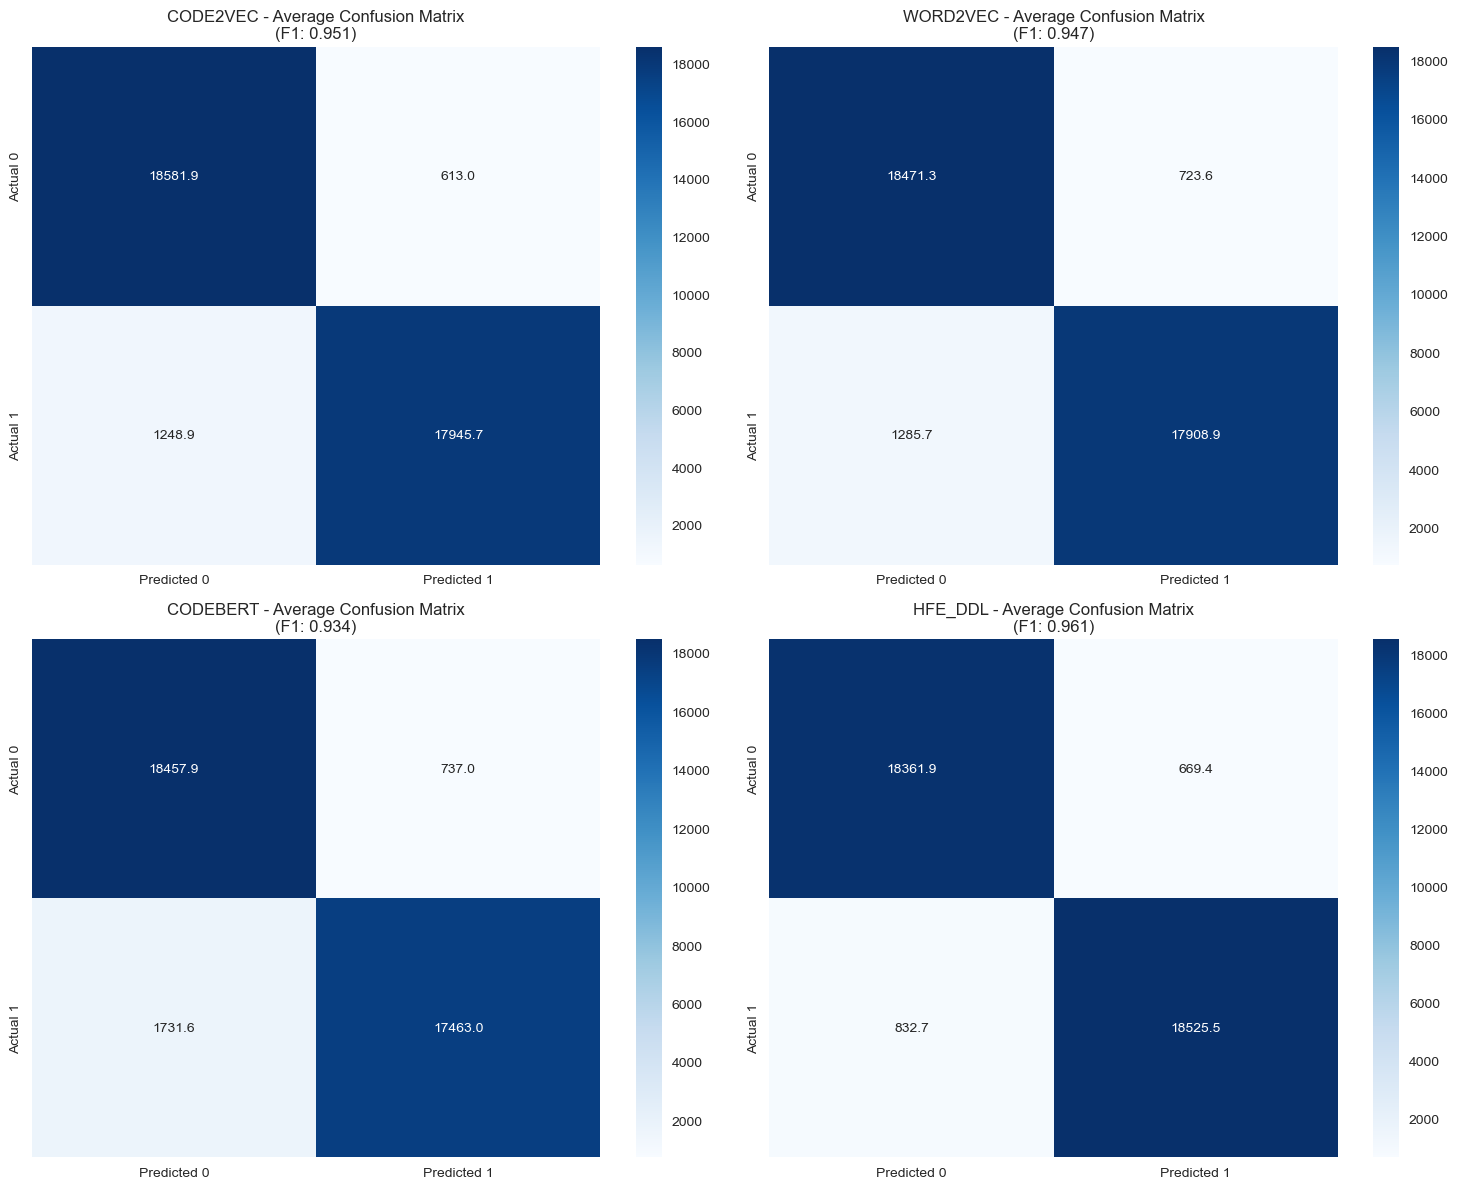

Average confusion matrices saved to '../outputs/average_confusion_matrices.png'


In [6]:
if all_results is not None:
    # Calculate average confusion matrices
    print("\nAverage Confusion Matrices:")
    print("=" * 50)
    
    confusion_data = all_results.groupby('model').agg({
        'tp': 'mean',
        'fp': 'mean', 
        'fn': 'mean',
        'tn': 'mean'
    }).round(1)
    
    print(confusion_data)
    
    # Visualize confusion matrices
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    models = all_results['model'].unique()
    
    for i, model in enumerate(models):
        if i < len(axes):
            model_data = all_results[all_results['model'] == model]
            
            # Average confusion matrix
            avg_tp = model_data['tp'].mean()
            avg_fp = model_data['fp'].mean()
            avg_fn = model_data['fn'].mean()
            avg_tn = model_data['tn'].mean()
            
            conf_matrix = np.array([[avg_tn, avg_fp], [avg_fn, avg_tp]])
            
            # Plot confusion matrix
            sns.heatmap(conf_matrix, annot=True, fmt='.1f', cmap='Blues', 
                       xticklabels=['Predicted 0', 'Predicted 1'],
                       yticklabels=['Actual 0', 'Actual 1'],
                       ax=axes[i])
            
            axes[i].set_title(f'{model.upper()} - Average Confusion Matrix\n(F1: {model_data["f1_score"].mean():.3f})')
    
    # Remove empty subplots
    for i in range(len(models), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.savefig('../outputs/average_confusion_matrices.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Average confusion matrices saved to '../outputs/average_confusion_matrices.png'")

## 6. Detailed Performance Metrics

In [7]:
if all_results is not None:
    # Calculate additional performance metrics
    print("\nDetailed Performance Metrics:")
    print("=" * 80)
    
    detailed_metrics = []
    
    for model in all_results['model'].unique():
        model_data = all_results[all_results['model'] == model]
        
        # Basic metrics
        avg_tp = model_data['tp'].mean()
        avg_fp = model_data['fp'].mean()
        avg_fn = model_data['fn'].mean()
        avg_tn = model_data['tn'].mean()
        
        # Derived metrics
        tpr = avg_tp / (avg_tp + avg_fn)  # Sensitivity/Recall
        tnr = avg_tn / (avg_tn + avg_fp)  # Specificity
        fpr = avg_fp / (avg_fp + avg_tn)  # False Positive Rate
        fnr = avg_fn / (avg_fn + avg_tp)  # False Negative Rate
        
        # F1 components
        precision = avg_tp / (avg_tp + avg_fp) if (avg_tp + avg_fp) > 0 else 0
        recall = tpr
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        detailed_metrics.append({
            'Model': model,
            'F1-Score': f1,
            'Accuracy': model_data['accuracy'].mean(),
            'Precision': precision,
            'Recall': recall,
            'Specificity': tnr,
            'FPR': fpr,
            'FNR': fnr,
            'TP': avg_tp,
            'FP': avg_fp,
            'FN': avg_fn,
            'TN': avg_tn
        })
    
    detailed_df = pd.DataFrame(detailed_metrics).round(4)
    print(detailed_df.to_string(index=False))
    
    # Save detailed metrics
    detailed_df.to_csv('../outputs/detailed_performance_metrics.csv', index=False)
    print(f"\nDetailed metrics saved to '../outputs/detailed_performance_metrics.csv'")


Detailed Performance Metrics:
   Model  F1-Score  Accuracy  Precision  Recall  Specificity    FPR    FNR      TP    FP     FN      TN
code2vec    0.9507    0.9515     0.9670  0.9349       0.9681 0.0319 0.0651 17945.7 613.0 1248.9 18581.9
word2vec    0.9469    0.9477     0.9612  0.9330       0.9623 0.0377 0.0670 17908.9 723.6 1285.7 18471.3
codebert    0.9340    0.9357     0.9595  0.9098       0.9616 0.0384 0.0902 17463.0 737.0 1731.6 18457.9
 hfe_ddl    0.9610    0.9608     0.9651  0.9570       0.9648 0.0352 0.0430 18525.5 669.4  832.7 18361.9

Detailed metrics saved to '../outputs/detailed_performance_metrics.csv'


## 7. Conclusion and Summary

In [8]:
if all_results is not None:
    print("EXPERIMENT SUMMARY")
    print("=" * 60)
    
    # Best performing model
    best_f1_model = all_results.groupby('model')['f1_score'].mean().idxmax()
    best_f1_score = all_results.groupby('model')['f1_score'].mean().max()
    
    best_acc_model = all_results.groupby('model')['accuracy'].mean().idxmax()
    best_acc_score = all_results.groupby('model')['accuracy'].mean().max()
    
    print(f"\nBest F1 Score: {best_f1_model} ({best_f1_score:.4f})")
    print(f"Best Accuracy: {best_acc_model} ({best_acc_score:.4f})")
    
    # Performance improvement over best baseline
    baseline_models = [model for model in all_results['model'].unique() if model != 'hfe_ddl']
    if baseline_models:
        best_baseline_f1 = all_results[all_results['model'].isin(baseline_models)].groupby('model')['f1_score'].mean().max()
        improvement = ((best_f1_score - best_baseline_f1) / best_baseline_f1) * 100
        
        print(f"\nHFE-DDL improvement over best baseline: {improvement:.2f}%")
    
    # Statistical significance summary
    print(f"\nStatistical Significance Summary:")
    print("-" * 40)
    
    paired_results = all_results.pivot_table(
        index=['run', 'fold'],
        columns='model',
        values='f1_score'
    ).reset_index()
    
    for baseline in baseline_models:
        if 'hfe_ddl' in paired_results.columns and baseline in paired_results.columns:
            hfe_scores = paired_results['hfe_ddl'].dropna()
            baseline_scores = paired_results[baseline].dropna()
            
            min_len = min(len(hfe_scores), len(baseline_scores))
            hfe_scores = hfe_scores[:min_len]
            baseline_scores = baseline_scores[:min_len]
            
            t_stat, p_value = stats.ttest_rel(hfe_scores, baseline_scores)
            
            significance = "✓" if p_value < 0.05 else "✗"
            direction = "better" if hfe_scores.mean() > baseline_scores.mean() else "worse"
            
            print(f"HFE-DDL vs {baseline:10}: {significance} Statistically significant ({direction}), p={p_value:.4f}")

print("\n" + "="*60)
print("RESULTS ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*60)
print("\nAll results and visualizations have been saved to the '../outputs/' directory.")
print("\nKey files generated:")
print("  - comprehensive_performance_analysis.png")
print("  - average_confusion_matrices.png") 
print("  - detailed_performance_metrics.csv")
print("\nThese results demonstrate the effectiveness of the HFE-DDL model for vulnerability detection.")

EXPERIMENT SUMMARY

Best F1 Score: hfe_ddl (0.9606)
Best Accuracy: hfe_ddl (0.9608)

HFE-DDL improvement over best baseline: 1.04%

Statistical Significance Summary:
----------------------------------------
HFE-DDL vs code2vec  : ✓ Statistically significant (better), p=0.0000
HFE-DDL vs word2vec  : ✓ Statistically significant (better), p=0.0000
HFE-DDL vs codebert  : ✓ Statistically significant (better), p=0.0000

RESULTS ANALYSIS COMPLETED SUCCESSFULLY!

All results and visualizations have been saved to the '../outputs/' directory.

Key files generated:
  - comprehensive_performance_analysis.png
  - average_confusion_matrices.png
  - detailed_performance_metrics.csv

These results demonstrate the effectiveness of the HFE-DDL model for vulnerability detection.
